<a href="https://colab.research.google.com/github/Boudouaromar/Sentiment-Analysis/blob/master/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from string import punctuation

In [0]:
# Read the data from CSV files

import pandas as pd 


data_positive=pd.read_csv('pos_tweets.csv')
data_negative=pd.read_csv('neg_tweets.csv')

In [0]:
# Create balanced dataset

import numpy as np


sample_size = min(data_positive.shape[0], data_negative.shape[0])
raw_data = np.concatenate((data_positive['tweets'].values[:sample_size], 
                           data_negative['tweets'].values[:sample_size])) 
labels = [1]*sample_size + [0]*sample_size

In [0]:
#Preprocessing data
import re


def clean_tweets(tweet):
    user_removed = re.sub(r'@[A-Za-z0-9]+','',tweet)
    link_removed = re.sub('https?://[A-Za-z0-9./]+','',user_removed)
    number_removed = re.sub('[^a-zA-Z]', ' ', link_removed)
    lower_case_tweet= number_removed.lower()
    tok = WordPunctTokenizer()
    words = tok.tokenize(lower_case_tweet)
    clean_tweet = (' '.join(words)).strip()
    return clean_tweet


data = [clean_tweets(t) for t in raw_data]


In [0]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words


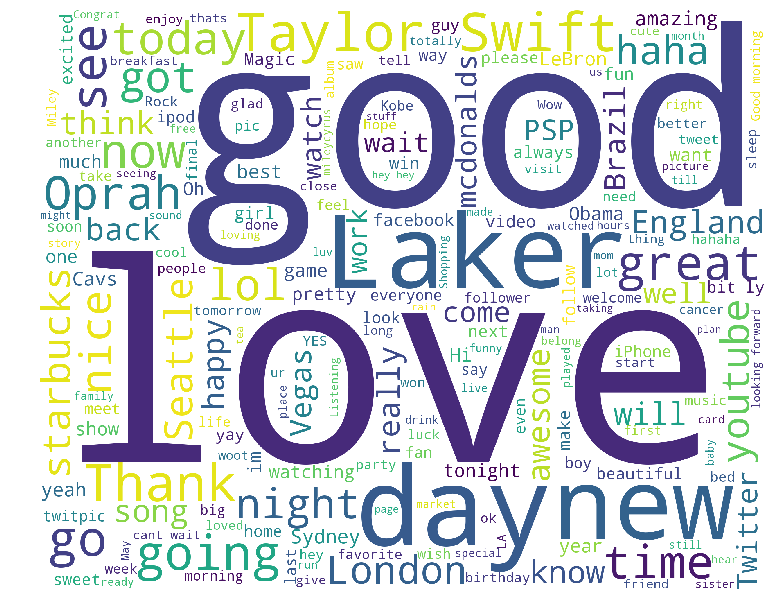

Negative words


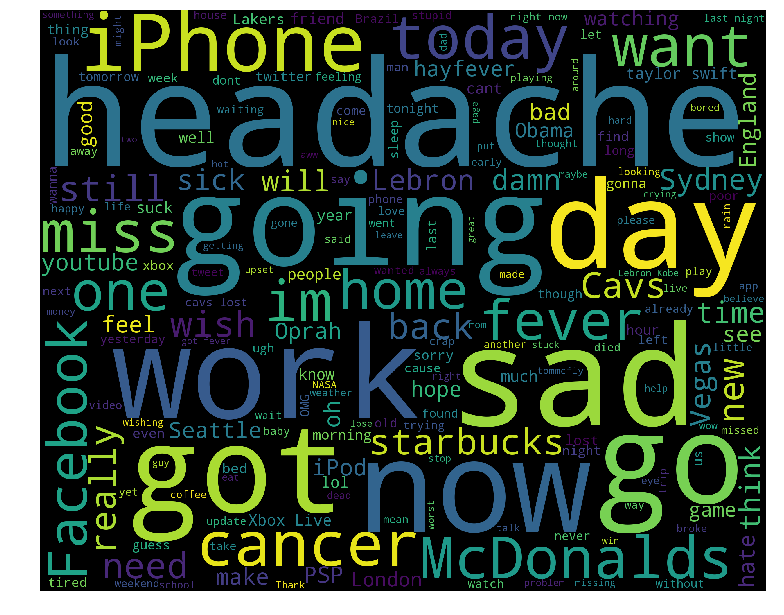

In [0]:
print("Positive words")
wordcloud_draw(data_positive["tweets"],'white')
print("Negative words")
wordcloud_draw(data_negative["tweets"])

In [0]:
data=data_negative+data_negative

In [0]:
data["cleaned_tweets"]=data["tweets"].apply(lambda x:clean_tweets(x))

In [0]:
data.head(10)

,tweets,cleaned_tweets
0,""" cavs lost, and I got this sinking feeling we...",cavs lost and i got this sinking feeling we ar...
1,""" the closest BGT tour is Cardiff or London da...",the closest bgt tour is cardiff or london dam ...
2,""" Why do other pet care people try to run othe...",why do other pet care people try to run others...
3,"""-gasps- dananananaykroyd touring aussie .... ...",gasps dananananaykroyd touring aussie grrr why...
4,"""....If i am going warsal that means no church...",if i am going warsal that means no church in t...
5,"""....wow the CAVS are sleeping ! I hate these ...",wow the cavs are sleeping i hate these blowout...
6,"""...no more Lebron """"...no more Lebron """,no more lebron no more lebron
7,"""'adawiyah is having fever. hope the other 2 ...",adawiyah is having fever hope the other are no...
8,"""[-O] I wish the frogs weren't becoming extinc...",o i wish the frogs weren t becoming extinct o ...
9,"""@ Starbucks Windward Mall lovin the AC. Home ...",starbucks windward mall lovin the ac home is t...


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser=SentimentIntensityAnalyzer()

def Vader_score(tweets):
    vadersenti = analyser.polarity_scores(tweets)
    sentiment=[]
    index=["pos","neg","neu","compound"]
    
    for i in index:
        sentiment.append(vadersenti[i])
    return sentiment[3]    



In [0]:
data["Vader_score"]=data["cleaned_tweets"].apply(lambda x: Vader_score(x))
data.head()

,tweets,cleaned_tweets,Vader_score
0,""" cavs lost, and I got this sinking feeling we...",cavs lost and i got this sinking feeling we ar...,-0.8625
1,""" the closest BGT tour is Cardiff or London da...",the closest bgt tour is cardiff or london dam ...,0.6597
2,""" Why do other pet care people try to run othe...",why do other pet care people try to run others...,0.3400
3,"""-gasps- dananananaykroyd touring aussie .... ...",gasps dananananaykroyd touring aussie grrr why...,-0.8555
4,"""....If i am going warsal that means no church...",if i am going warsal that means no church in t...,-0.9559


In [0]:
def print_sentiment_scores(tweets):
    vadersenti = analyser.polarity_scores(tweets)
    sentiment=[]
    index=["pos","neg","neu","compound"]
    
    for i in index:
        sentiment.append(vadersenti[i]) 

    if sentiment[3]>=0.5:
        tweet_sentiment='positive'
    elif sentiment[3]>-0.5:
        tweet_sentiment="neutral"
    else:tweet_sentiment="negative"
    return tweet_sentiment   



In [0]:
data["sentiment"]=data["cleaned_tweets"].apply(lambda x: print_sentiment_scores(x))

In [0]:
data.head(10)

,tweets,cleaned_tweets,Vader_score,sentiment
0,""" cavs lost, and I got this sinking feeling we...",cavs lost and i got this sinking feeling we ar...,-0.8625,negative
1,""" the closest BGT tour is Cardiff or London da...",the closest bgt tour is cardiff or london dam ...,0.6597,positive
2,""" Why do other pet care people try to run othe...",why do other pet care people try to run others...,0.3400,neutral
3,"""-gasps- dananananaykroyd touring aussie .... ...",gasps dananananaykroyd touring aussie grrr why...,-0.8555,negative
4,"""....If i am going warsal that means no church...",if i am going warsal that means no church in t...,-0.9559,negative
5,"""....wow the CAVS are sleeping ! I hate these ...",wow the cavs are sleeping i hate these blowout...,0.0516,neutral
6,"""...no more Lebron """"...no more Lebron """,no more lebron no more lebron,-0.5267,negative
7,"""'adawiyah is having fever. hope the other 2 ...",adawiyah is having fever hope the other are no...,0.7003,positive
8,"""[-O] I wish the frogs weren't becoming extinc...",o i wish the frogs weren t becoming extinct o ...,0.6597,positive
9,"""@ Starbucks Windward Mall lovin the AC. Home ...",starbucks windward mall lovin the ac home is t...,0.0000,neutral


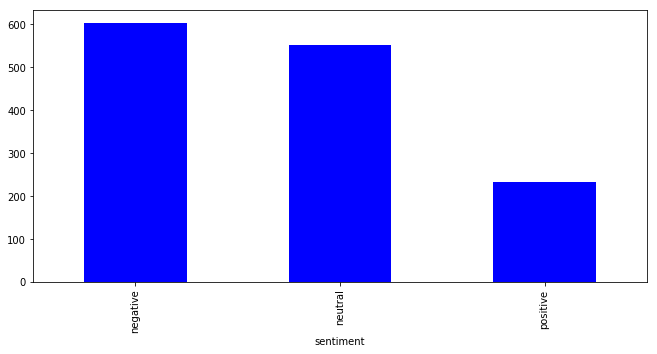

In [0]:
data.groupby('sentiment').size().plot(kind='bar',figsize=(11, 5))